# Learn Keras for Deep Neural Networks
## Chapter 3 - Deep Neural Networks for Supervised Learning - Regression

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df  = pd.read_csv("/Users/jmoolay/Personal/Apress/Learn Keras for DNN/First Draft/Chapter 3/Data/train.csv")



/Users/jmoolay/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print("Shape of the Dataset:",df.shape)
#the head method displays the first 5 rows of the data
df.head(5)  


Shape of the Dataset: (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
store  = pd.read_csv("/Users/jmoolay/Personal/Apress/Learn Keras for DNN/First Draft/Chapter 3/Data/store.csv")
print("Shape of the Dataset:",store.shape)

#Display the first 5 rows of data using the head method of pandas dataframe
store.head(5)


Shape of the Dataset: (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Metadata
*	**Store** - a unique Id for each store
*	**Sales** - the turnover for a given day (Our target y variable)
*	**Customers** - the number of customers on a given day
*	**Open** - an indicator for whether the store was open: 0 = closed, 1 = open
*	**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
*	**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
*	**StoreType** - differentiates between 4 different store models: a, b, c, d
*	**Assortment** - describes an assortment level: a = basic, b = extra, c = extended
*	**CompetitionDistance** - distance in meters to the nearest competitor store
*	**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened
*	**Promo **- indicates whether a store is running a promo on that day
*	**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*	**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2
*	**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


### Data Exploration

In [9]:
df_new = df.merge(store,on=["Store"], how="inner")
print(df_new.shape)


(1017209, 18)


In [10]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))


Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


In [11]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [9]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [12]:
#We can extract all date properties from a datetime datatype 
df_new["Date"] = pd.to_datetime(df_new["Date"])
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week

df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",
                        np.where(df_new["Month"].isin([6,7,8]),"Summer",
                            np.where(df_new["Month"].isin([9,10,11]),"Fall",
                                np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))

#Using the head command to view (only) the data and the newly engineered features
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())


        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


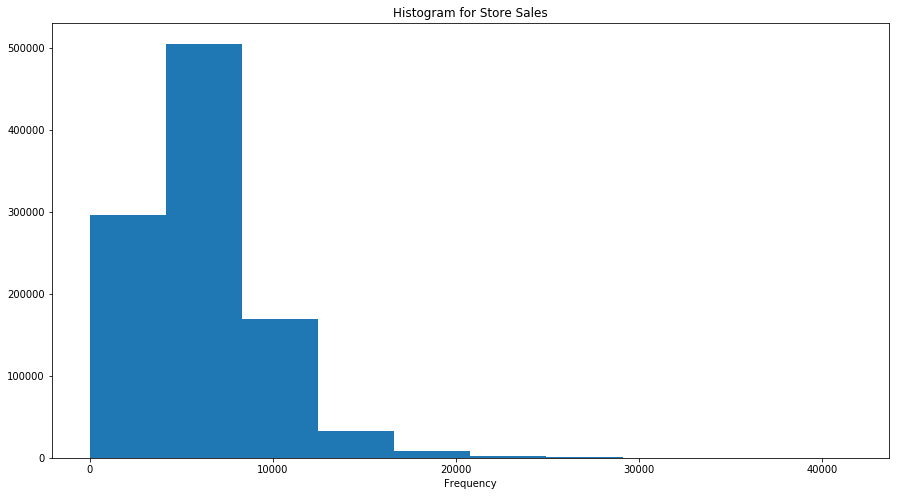

In [13]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8)) 
plt.hist(df_new["Sales"])  
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109f00668>,
      dtype=object)

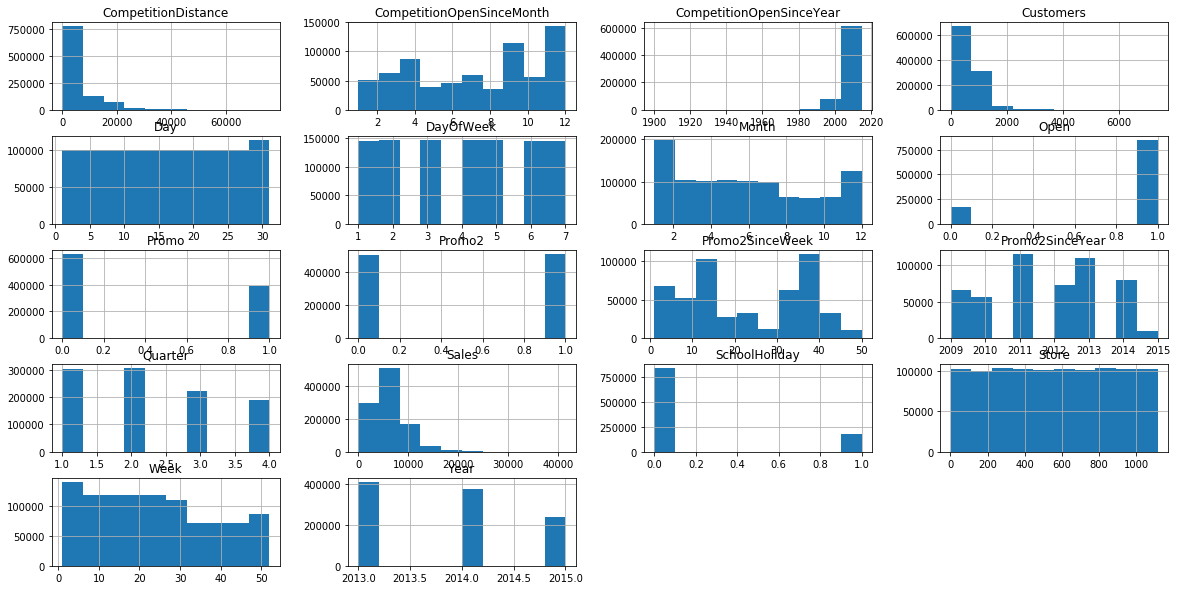

In [14]:
#Use the  histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df_new.hist(figsize=(20,10))


In [14]:
df_new.isnull().sum()/df_new.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [15]:
#Replace nulls with the mode
df_new["CompetitionDistance"]= df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])

#Double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100


0.0

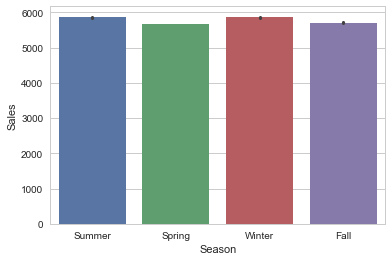

In [16]:
import seaborn as sns  #Seaborn is another powerful visulization library for Python
sns.set(style="whitegrid")

#Create the bar plot for Average Sales acrss different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new) 



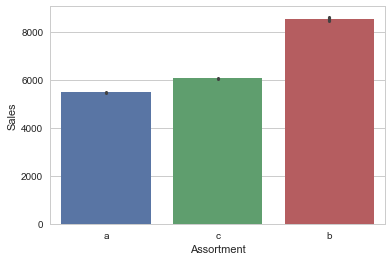

In [17]:
#Create the bar plot for Average Sales acrss different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new) 


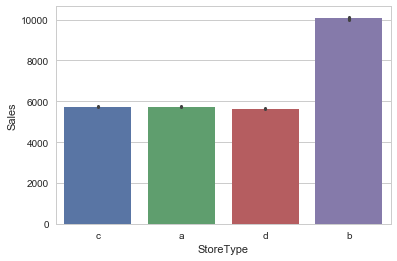

In [18]:
#Create the bar plot for Average Sales acrss different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new) 


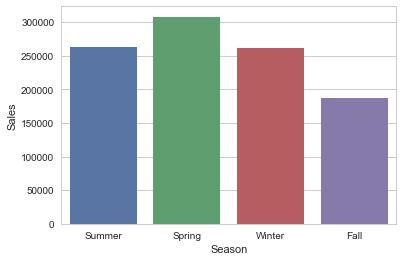

In [19]:
ax = sns.barplot(x="Season", y="Sales", data=df_new,estimator=np.size) 

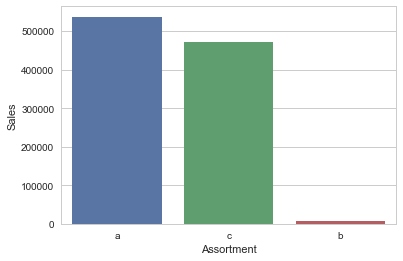

In [20]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,estimator=np.size) 

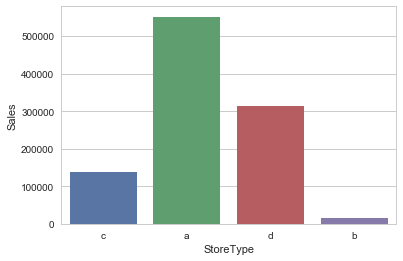

In [21]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new,estimator=np.size)

### Data Engineering

In [17]:
#Define a variable for each type of feature
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year", "StoreType","Assortment","Season"]

#Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

#Since the above function coverts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)


In [18]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())


Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [24]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [19]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [20]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check the data tpye
temp.dtypes.unique()



array([dtype('int64'), dtype('float64')], dtype=object)

In [21]:
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(temp,df_new[target],test_size=0.2,random_state=2018)
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)


Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


### Creating Baseline Accuracy

In [22]:
#calcualte the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales) 



Average Sales : Sales    5773.099997
dtype: float64


In [23]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])


MAE for Test Data: 2883.587604303215


### Designing the Deep Neural Network

In [25]:
#Create Deep Neural Network Architecuture
from keras import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
#The input_dim =44, since the width of the training data=44 (refer data engg section)
model.add(Dense(1,activation = "linear"))

#Configure the model
model.compile(optimizer='adam', loss="mean_absolute_error", 
metrics=["mean_absolute_error"])

#Train the model
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)


Train on 732390 samples, validate on 81377 samples
Epoch 1/10
170368/732390 [=====>........................] - ETA: 8s - loss: 1167.5523 - mean_absolute_error: 1167.5523

KeyboardInterrupt: 

In [33]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test,y_test)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

203442/203442 [==============================] - 2s 12us/step
Metric  loss : 680.87
Metric  mean_absolute_error : 680.87


In [34]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

history = model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

#result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 17s 24us/step - loss: 1685284.7051 - mean_absolute_error: 842.3630 - val_loss: 1174945.7529 - val_mean_absolute_error: 745.3857
Epoch 2/10
732390/732390 [==============================] - 18s 24us/step - loss: 1133273.9932 - mean_absolute_error: 714.4024 - val_loss: 1030627.0530 - val_mean_absolute_error: 684.4272
Epoch 3/10
732390/732390 [==============================] - 18s 25us/step - loss: 1080269.2895 - mean_absolute_error: 696.7061 - val_loss: 1023557.0454 - val_mean_absolute_error: 689.8529
Epoch 4/10
732390/732390 [==============================] - 17s 23us/step - loss: 1052242.8948 - mean_absolute_error: 688.3971 - val_loss: 1010271.0455 - val_mean_absolute_error: 679.7989: 1s - loss: 1054645.6395 - mean_abs
Epoch 5/10
732390/732390 [==============================] - 17s 23us/step - loss: 1027299.5754 - mean_absolute_error: 681.3595 - val_loss: 1048043.9851 - val_mea

In [35]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 26s 36us/step - loss: 1703936.0100 - mean_absolute_error: 851.6688 - val_loss: 1094603.5317 - val_mean_absolute_error: 706.9305
Epoch 2/15
732390/732390 [==============================] - 27s 36us/step - loss: 1161501.9745 - mean_absolute_error: 721.2931 - val_loss: 1518559.0173 - val_mean_absolute_error: 825.1943
Epoch 3/15
732390/732390 [==============================] - 27s 37us/step - loss: 1096785.3552 - mean_absolute_error: 700.4759 - val_loss: 1015062.7743 - val_mean_absolute_error: 681.1888
Epoch 4/15
732390/732390 [==============================] - 26s 35us/step - loss: 1059616.4927 - mean_absolute_error: 688.3707 - val_loss: 966881.8669 - val_mean_absolute_error: 663.8176
Epoch 5/15
732390/732390 [==============================] - 24s 32us/step - loss: 1037982.0962 - mean_absolute_error: 682.4485 - val_loss: 1205937.6576 - val_mean_absolute_error: 722.0176
Epoch 6/15

In [36]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 31s 43us/step - loss: 1675714.8295 - mean_absolute_error: 847.2072 - val_loss: 1209506.8428 - val_mean_absolute_error: 739.2296
Epoch 2/15
732390/732390 [==============================] - 28s 38us/step - loss: 1146683.8457 - mean_absolute_error: 721.9335 - val_loss: 1052483.8034 - val_mean_absolute_error: 694.7749
Epoch 3/15
732390/732390 [==============================] - 28s 38us/step - loss: 1090371.9723 - mean_absolute_error: 704.6053 - val_loss: 1155228.5809 - val_mean_absolute_error: 723.6143
Epoch 4/15
732390/732390 [==============================] - 30s 41us/step - loss: 1053807.4279 - mean_absolute_error: 691.2609 - val_loss: 977870.9284 - val_mean_absolute_error: 678.1103
Epoch 5/15
732390/732390 [==============================] - 31s 42us/step - loss: 1032429.1545 - mean_absolute_error: 683.1416 - val_loss: 1091104.8923 - val_mean_absolute_error: 720.4713
Epoch 6/15

### Training the model with increased number of epochs

In [37]:
from keras.callbacks import History 
history = History()

model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))

model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val), 
epochs=15,batch_size=64,callbacks=[history])

result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


Train on 732390 samples, validate on 81377 samples
Epoch 1/15
732390/732390 [==============================] - 68s 93us/step - loss: 1651341.4221 - mean_absolute_error: 842.8398 - val_loss: 1437441.5570 - val_mean_absolute_error: 846.5724
Epoch 2/15
732390/732390 [==============================] - 76s 103us/step - loss: 1172239.3975 - mean_absolute_error: 724.5272 - val_loss: 1027307.6079 - val_mean_absolute_error: 687.9113
Epoch 3/15
732390/732390 [==============================] - 79s 107us/step - loss: 1097080.7497 - mean_absolute_error: 701.4850 - val_loss: 1118859.0153 - val_mean_absolute_error: 691.1942
Epoch 4/15
732390/732390 [==============================] - 75s 102us/step - loss: 1061126.0586 - mean_absolute_error: 689.7148 - val_loss: 984014.0228 - val_mean_absolute_error: 677.7901
Epoch 5/15
732390/732390 [==============================] - 84s 115us/step - loss: 1030376.0530 - mean_absolute_error: 680.4842 - val_loss: 1090608.2013 - val_mean_absolute_error: 698.9978
Epoch 

### Visualing the final results

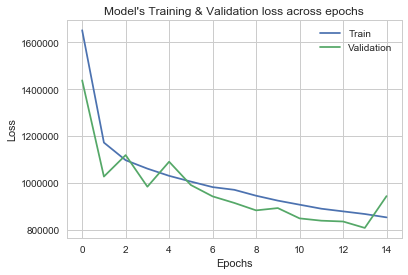

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [39]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

#Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))

        Actual Sales  Predicted Sales
115563             0         0.538026
832654             0         0.538026
769112          2933      3213.734375
350588          8602      7482.583496
141556          6975      6102.960449
84435           9239      9298.575195
53018              0         0.538026
262419             0         0.538026
702267          5885      5403.159668
981431             0         0.538026
MSE : 944228.935376212
MAE : 647.6771869731368
